In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as K

from sklearn.model_selection import KFold
from keras.models import Model, Sequential
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
from ipynb.fs.full.DatasetManage import read_and_store_data
from ipynb.fs.full.FeatureExtraction import feature_extraction
from ipynb.fs.full.ClassificationPerformanceIndexes import classificationPerformanceIndexes, printClassificationPerformanceIndexes
from ipynb.fs.full.ClassificationMethods import CompleteLSTM

Parameter

In [3]:
perfInd = ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'F1 Score', 'MCC', 'Kappa', 'Time']
channels = ['FP1-F7', 'F7-T7','T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'seizure']

dataset = 'CHB_MIT'
csvImportFile = 'CHB.csv'
csvExportFile = 'CHB.csv'
sample_rate = 256
time_window = 2
step = time_window * sample_rate

test_ratio = 0.3

pca_tolerance = 0.9

undersampling_rate = 0.2

oversampling_neighbors = 11

k_fold = 5

csvAverageFile = 'Features.csv'

batch = 10
epochs = 100
dropout_percentage = 0.2
loss_function = 'mean_squared_error'
metric = 'accuracy'

Create Training and Test Data

In [4]:
def trainTestData (features, test_ratio, k_fold, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_ratio, shuffle = True)
    results = pd.DataFrame(columns = perfInd)
    kf = KFold(n_splits = k_fold, shuffle = True)
    return x_train, x_test, y_train, y_test, results, kf

Read and Store Data

In [5]:
print('Reading data from', csvImportFile)
df = pd.read_csv(csvImportFile, delimiter = ',', header = 0)

Reading data from CHB.csv


Feature Extraction 

In [6]:
# ft = feature_extraction(df, sample_rate, step, pca_tolerance, undersampling_rate, oversampling_neighbors)

Train and Test process

In [7]:
ft = pd.read_csv(csvAverageFile, delimiter = ',', header = 0)

In [8]:
x_train, x_test, y_train, y_test, results, kf = trainTestData (ft, test_ratio, k_fold, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

Create training and validation and test data

In [26]:
from sklearn.model_selection import train_test_split

def trainTestData_2 (features, perfInd):
    x = features.loc[:, features.columns != 'seizure']
    y = features['seizure']
    x_1, x_test, y_1, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(x_1, y_1, test_size=0.2, random_state=42)
    results = pd.DataFrame(columns = perfInd)
    return x_train, x_test, y_train, y_test, x_val, y_val, results

In [25]:
x_train, x_test, y_train, y_test, x_val, y_val, results = trainTestData_2 (ft, perfInd)

x_train = np.reshape(x_train.values, (x_train.shape[0], 1, x_train.shape[1]))
y_train = y_train.values.astype(int)
x_val = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_val = y_test.values.astype(int)
x_test = np.reshape(x_test.values, (x_test.shape[0], 1, x_test.shape[1]))
y_test = y_test.values.astype(int)

print(np.shape(x_train))
print(np.shape(y_train))

(313, 1, 86)
(313,)


Epoch 1/800
79/79 [==============================] - 4s 13ms/step - loss: 0.7802 - accuracy: 0.4856 - val_loss: 0.7559 - val_accuracy: 0.5119
Epoch 2/800
79/79 [==============================] - 0s 4ms/step - loss: 0.7676 - accuracy: 0.4856 - val_loss: 0.7450 - val_accuracy: 0.5119
Epoch 3/800
79/79 [==============================] - 0s 5ms/step - loss: 0.7552 - accuracy: 0.4856 - val_loss: 0.7333 - val_accuracy: 0.5119
Epoch 4/800
79/79 [==============================] - 0s 5ms/step - loss: 0.7417 - accuracy: 0.4856 - val_loss: 0.7212 - val_accuracy: 0.5119
Epoch 5/800
79/79 [==============================] - 0s 5ms/step - loss: 0.7269 - accuracy: 0.4856 - val_loss: 0.7076 - val_accuracy: 0.5119
Epoch 6/800
79/79 [==============================] - 0s 5ms/step - loss: 0.7108 - accuracy: 0.4856 - val_loss: 0.6929 - val_accuracy: 0.5119
Epoch 7/800
79/79 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.4856 - val_loss: 0.6759 - val_accuracy: 0.5119
Epoch 8/800


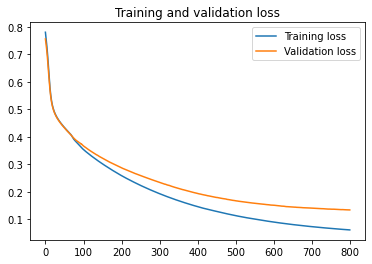

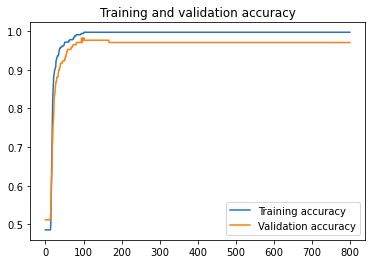

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, None, 32)          15232     
                                                                 
 gru_15 (GRU)                (None, 32)                6336      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 21,603
Trainable params: 21,603
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, LSTM, Dense
from keras import optimizers
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(32, return_sequences=True,input_shape=(None, x_train.shape[-1])))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))

optimizer = optimizers.Adam(learning_rate=0.0001)  
# Definisco l'ottimizzatore con il learning rate iniziale
#initial_learning_rate = 0.001
#optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

# Definisco il learning rate schedule con decay lineare
#decay_steps = 1000  # Numero di passi di addestramento dopo i quali applicare il decay
#decay_rate = 0.1  # Tasso di decay
#lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps, decay_rate, staircase=True)

# Aggiunta dello strato di output
model.add(Dense(1, activation='sigmoid'))

# Compilazione del modello
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Addestramento del modello con il learning rate modificato
history = model.fit(x_train, y_train, epochs=800, batch_size=4, validation_data=(x_val, y_val))
                    # callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])


train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(train_loss))

plt.figure()
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()
plt.plot(epochs, train_acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

model.summary()





In [38]:
model.summary()

# Valutazione del modello
loss, accuracy = model.evaluate(x_test, y_test)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, None, 32)          15232     
                                                                 
 gru_15 (GRU)                (None, 32)                6336      
                                                                 
 dense_27 (Dense)            (None, 1)                 33        
                                                                 
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 21,603
Trainable params: 21,603
Non-trainable params: 0
_________________________________________________________________
6/6 [==============================] - 1s 3ms/step - loss: 0.1343 - accuracy: 0.9702
